In [1]:
import pandas as pd
import numpy as np

In [4]:
d = pd.read_csv("C:/Admission_Predict.csv")

In [5]:
d.index

RangeIndex(start=0, stop=400, step=1)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
d.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
d.shape

(400, 9)

In [11]:
d.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
d.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [13]:
d.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
d.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
d['Chance of Admit '] = np.where(d['Chance of Admit '] > 0.9, 1, 0)
f = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
r = ['Chance of Admit ']
x = d[f]
y = d[r]

In [19]:
y


,Chance of Admit
0,1
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,1
398,0


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

xt, xxt, yt, yyt = train_test_split(x, y, test_size = 0.2)

clf = DecisionTreeClassifier()
clf = clf.fit(xt, yt)

y_train_pred = clf.predict(xt) 
y_test_pred = clf.predict(xxt)

a = metrics.accuracy_score(y_train_pred, yt)
aa = metrics.accuracy_score(y_test_pred, yyt)

print(a)
print(aa)

1.0
0.95


In [29]:
clf1 = DecisionTreeClassifier()
print(cross_val_score(clf1, xt, yt, cv = 10, scoring = 'accuracy').mean())

0.959375


[Text(0.4166666666666667, 0.9375, 'x[6] <= 9.345\ngini = 0.228\nsamples = 320\nvalue = [278, 42]'),
 Text(0.16666666666666666, 0.8125, 'x[6] <= 9.21\ngini = 0.028\nsamples = 278\nvalue = [274, 4]'),
 Text(0.08333333333333333, 0.6875, 'gini = 0.0\nsamples = 263\nvalue = [263, 0]'),
 Text(0.25, 0.6875, 'x[5] <= 4.25\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.16666666666666666, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3333333333333333, 0.5625, 'x[1] <= 322.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4166666666666667, 0.4375, 'x[1] <= 331.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.3333333333333333, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.3125, 'x[3] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4166666666666667, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [

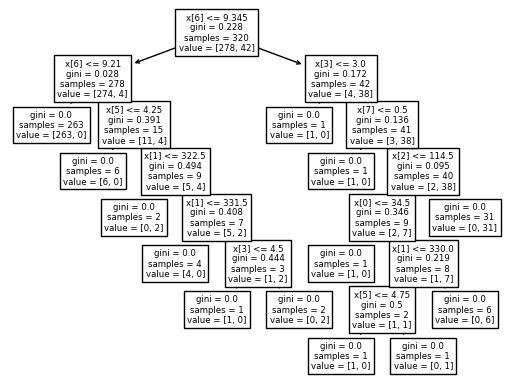

In [30]:
from sklearn import tree
tree.plot_tree(clf)